#**Projeto: Análise de Vendas em E-commerce: Insights Baseados em Dados**

**Objetivo**: Analisar os dados de vendas de uma loja de e-commerce para identificar padrões de compra, produtos mais vendidos, sazonalidades e clientes mais valiosos, fornecendo insights acionáveis para estratégias de negócios.


# Índice
- [1. Introdução](#introdução)
- [2. Configuração do Ambiente](#configuração-do-ambiente)
- [3. Carregamento e Exploração Inicial dos Dados](#carregamento-e-exploração-inicial-dos-dados)
- [4. Limpeza e Preparação dos Dados](#limpeza-e-preparação-dos-dados)
- [5. Análise Exploratória dos Dados (EDA)](#análise-exploratória-dos-dados-eda)
- [6. Interpretação de Resultados](#interpretação-de-resultados)
- [7. Visualizações Mais Complexas](#visualizações-mais-complexas)
- [8. Estatísticas e Modelagem](#estatísticas-e-modelagem)
- [9. Conclusão](#conclusão)

#<a name="introdução"></a>1. Introdução

**Descrição do Projeto:** Este projeto visa analisar um conjunto de dados de vendas de um e-commerce para extrair insights que possam orientar decisões estratégicas, como otimização de estoque, estratégias de marketing e segmentação de clientes.

**Objetivos Específicos:**

*   Identificar os países com maior receita;
*   Detectar padrões sazonais nas vendas;
*   Determinar os produtos mais vendidos.
*   Identificar os clientes mais valiosos.
*   Aplicar técnicas de modelagem para prever tendências futuras.






#<a name="configuração-do-ambiente"></a>2. Configuração do Ambiente
**Ferramentas Utilizadas:**

- **Google Colab:** Ambiente de desenvolvimento baseado na nuvem.
- **Python**: Linguagem de programação.
- **Bibliotecas:**
  - **'pandas'** e **'numpy'** para manipulação de dados.
  - **'matplotlib**' e seaborn para visualizações.
  - **'scikit-learn'** para modelagem.
  - **'plotly'** para visualizações interativas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


#<a name="carregamento-e-exploração-inicial-dos-dados"></a>3. Carregamento e Exploração Inicial dos Dados

###**Carregando o Dataset:**

In [2]:
# Carregamento dos dados
file_path = '/content/data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Exibindo as primeiras linhas
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###**Entendendo a estrutura dos dados:**

In [3]:
# Resumo dos dados
df.describe()



,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# Verificando tipos de dados e valores ausentes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Análise de Valores Ausentes:

In [5]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
Description,1454
CustomerID,135080


#<a name="limpeza-e-preparação-dos-dados"></a>4. Limpeza e Preparação dos Dados



###**Removendo Duplicatas:**

In [6]:
# Removendo duplicatas
df = df.drop_duplicates()



###**Conversão de Tipos de Dados:**

In [7]:
# Converter 'InvoiceDate' para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



###**Criação de novas colunas:**

In [8]:
# Criando uma nova coluna: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #Esta coluna traz o preço total pago pelo cliente

# Extrair mês e ano
df['Month'] = df['InvoiceDate'].dt.to_period('M') #Decidi criar uma nova coluna explicitando o mês para melhor apresentação

**Tratando Valores Ausentes:**

In [9]:
# Eliminar linhas com clientes desconhecidos
df = df.dropna(subset=['CustomerID'])

# Remover linhas com valores ausentes em colunas críticas
df = df.dropna(subset=['TotalPrice', 'InvoiceDate'])

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


#<a name="análise-exploratória-dos-dados-eda"></a>5. Análise Exploratória dos Dados (EDA)

###**1. Distribuição de Vendas por País**
**Objetivo:** Identificar os Top 10 países que mais contribuem para a receita.

In [10]:
# Agrupar vendas dos Top 10 países
vendas_por_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
vendas_por_pais






,TotalPrice
Country,
United Kingdom,6747156.154
Netherlands,284661.540
EIRE,250001.780
Germany,221509.470
France,196626.050
Australia,137009.770
Switzerland,55739.400
Spain,54756.030
Belgium,40910.960


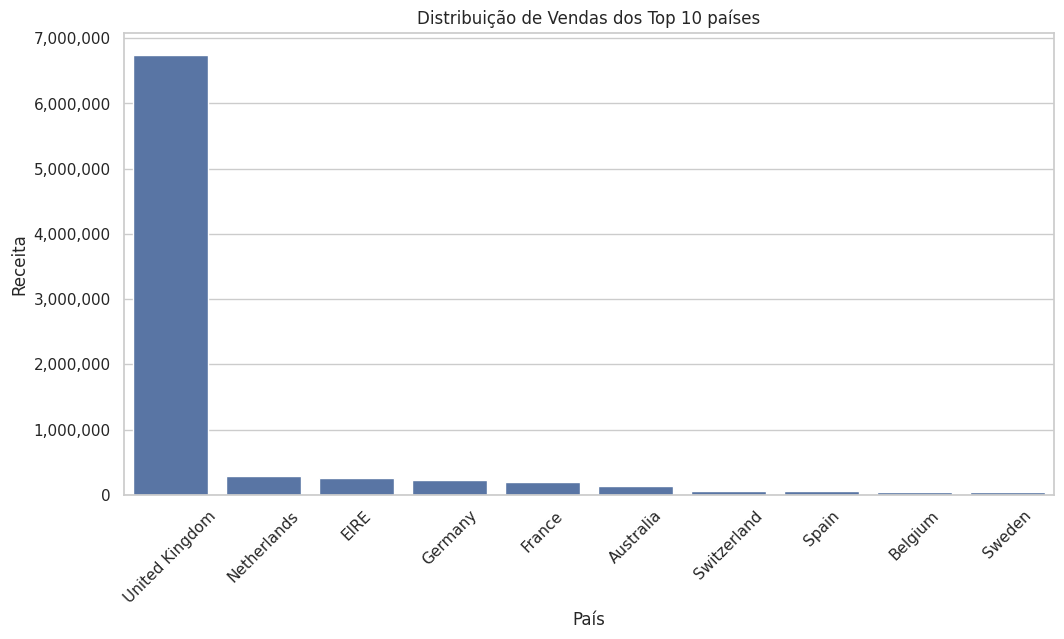

In [11]:
# Visualizar
plt.figure(figsize=(12,6))
sns.barplot(x=vendas_por_pais.index, y=vendas_por_pais.values)
plt.title('Distribuição de Vendas dos Top 10 países')
plt.xlabel('País')
plt.ylabel('Receita')

# Ajustar o formato do eixo y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()

###**2. Análise de Sazonalidade**
**Objetivo:** Detectar padrões sazonais nas vendas ao longo dos meses.



In [12]:
# Agrupar vendas por mês
vendas_por_mes = df.groupby('Month')['TotalPrice'].sum()
vendas_por_mes




,TotalPrice
Month,
2010-12,552372.860
2011-01,473731.900
2011-02,435534.070
2011-03,578576.210
2011-04,425222.671
2011-05,647011.670
2011-06,606862.520
2011-07,573112.321
2011-08,615078.090


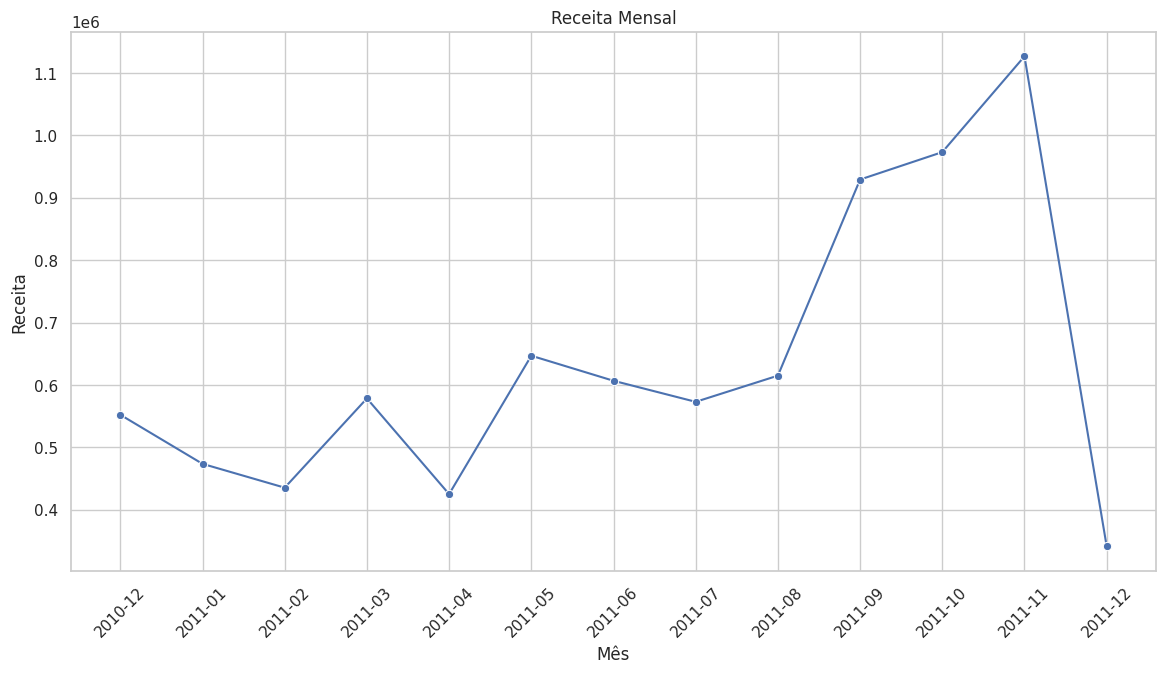

In [40]:
# Visualizar
plt.figure(figsize=(14,7))
sns.lineplot(x=vendas_por_mes.index.astype(str), y=vendas_por_mes.values, marker='o')
plt.title('Receita Mensal')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

###**3. Análise dos Produtos Mais Vendidos**
**Objetivo:** Identificar quais produtos têm maior volume de vendas.

In [78]:
# Agrupar por produto
produtos_mais_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
produtos_mais_vendidos




,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
POPCORN HOLDER,30492
RABBIT NIGHT LIGHT,27045
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25305


<ipython-input-79-eaaf3c285ec9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




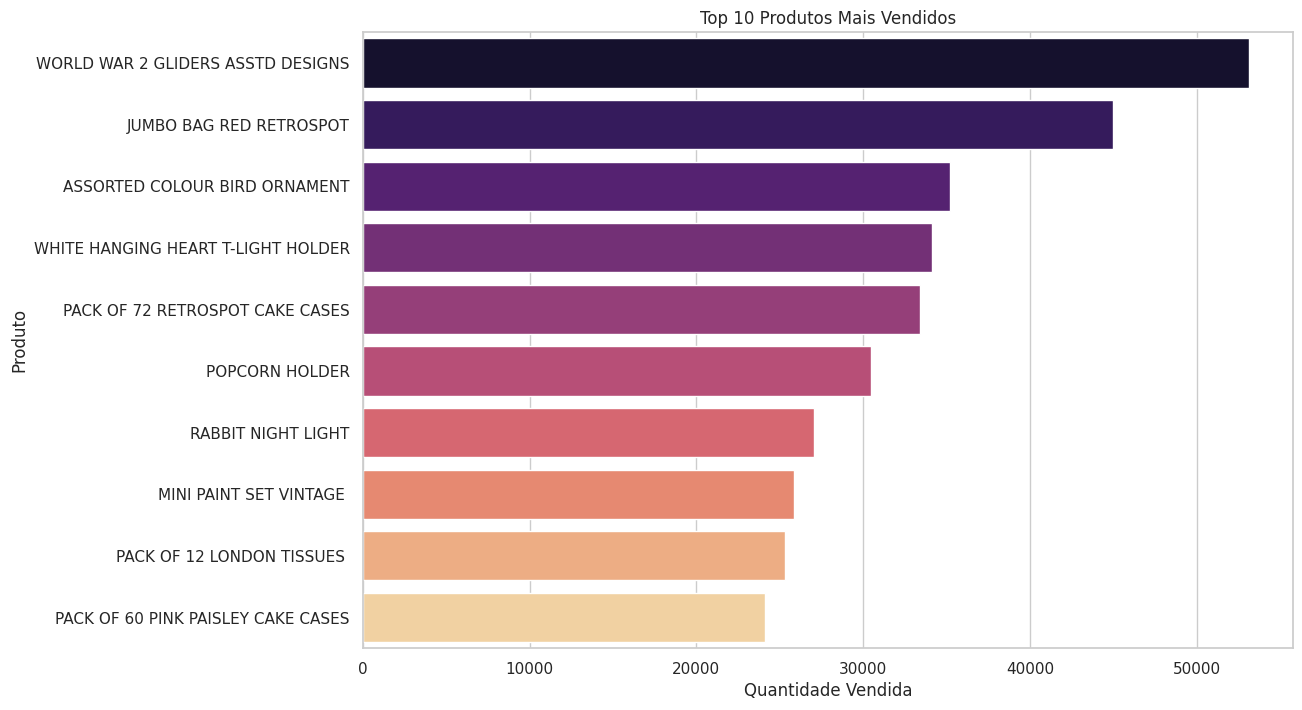

In [79]:
# Visualizar
plt.figure(figsize=(12,8))
sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette='magma')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

###A partir desse gráfico, podemos avaliar, também, como performou os produtos mais vendidos, durante o período analisado

In [60]:
# Agrupar por produto
produtos_por_mes = df[['Month', 'Description','Quantity']]
produtos_por_mes


,Month,Description,Quantity
0,2010-12,WHITE HANGING HEART T-LIGHT HOLDER,6
1,2010-12,WHITE METAL LANTERN,6
2,2010-12,CREAM CUPID HEARTS COAT HANGER,8
3,2010-12,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,2010-12,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...
541904,2011-12,PACK OF 20 SPACEBOY NAPKINS,12
541905,2011-12,CHILDREN'S APRON DOLLY GIRL,6
541906,2011-12,CHILDRENS CUTLERY DOLLY GIRL,4
541907,2011-12,CHILDRENS CUTLERY CIRCUS PARADE,4


In [85]:
# Calcular as vendas totais de cada produto
total_vendas = produtos_por_mes.groupby('Description')['Quantity'].sum()
total_vendas

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,138
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2387
I LOVE LONDON MINI BACKPACK,359
I LOVE LONDON MINI RUCKSACK,1
...,...
ZINC T-LIGHT HOLDER STARS SMALL,4850
ZINC TOP 2 DOOR WOODEN SHELF,5
ZINC WILLIE WINKIE CANDLE STICK,2594


In [86]:
# Selecionar os top 10 produtos com base nas vendas totais
top_10_produtos = total_vendas.nlargest(10).index
top_10_produtos

Index(['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT',
       'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER',
       'PACK OF 72 RETROSPOT CAKE CASES', 'POPCORN HOLDER',
       'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE ',
       'PACK OF 12 LONDON TISSUES ', 'PACK OF 60 PINK PAISLEY CAKE CASES'],
      dtype='object', name='Description')

In [88]:
# Filtrar os dados para incluir apenas os top 10 produtos
top_10 = produtos_por_mes[produtos_por_mes['Description'].isin(top_10_produtos)]
top_10

,Month,Description,Quantity
0,2010-12,WHITE HANGING HEART T-LIGHT HOLDER,6
9,2010-12,ASSORTED COLOUR BIRD ORNAMENT,32
44,2010-12,MINI PAINT SET VINTAGE,36
49,2010-12,WHITE HANGING HEART T-LIGHT HOLDER,6
66,2010-12,WHITE HANGING HEART T-LIGHT HOLDER,6
...,...,...,...
541678,2011-12,POPCORN HOLDER,4
541824,2011-12,RABBIT NIGHT LIGHT,24
541825,2011-12,POPCORN HOLDER,24
541874,2011-12,RABBIT NIGHT LIGHT,12


In [91]:
# Agrupar por mês e produto, e somar as vendas
df_mensal = df_top_10.groupby([df_top_10['Month'], 'Description'])['Quantity'].sum().unstack().fillna(0)
df_mensal

Description,ASSORTED COLOUR BIRD ORNAMENT,JUMBO BAG RED RETROSPOT,MINI PAINT SET VINTAGE,PACK OF 12 LONDON TISSUES,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER,RABBIT NIGHT LIGHT,WHITE HANGING HEART T-LIGHT HOLDER,WORLD WAR 2 GLIDERS ASSTD DESIGNS
Month,,,,,,,,,,
2010-12,2259.0,2030.0,2700.0,2656.0,1632.0,3542.0,0.0,0.0,3083.0,5139.0
2011-01,1691.0,2517.0,1907.0,445.0,730.0,3324.0,0.0,0.0,5450.0,1488.0
2011-02,1619.0,2969.0,829.0,2659.0,1450.0,1912.0,0.0,0.0,1820.0,3457.0
2011-03,2497.0,4923.0,2736.0,3507.0,2604.0,3719.0,0.0,0.0,1901.0,3888.0
2011-04,2368.0,2207.0,1548.0,2215.0,2501.0,2764.0,0.0,0.0,1789.0,10128.0
2011-05,3035.0,3466.0,1836.0,1443.0,3949.0,3210.0,0.0,1096.0,3831.0,3888.0
2011-06,1516.0,3523.0,1407.0,2397.0,1459.0,1778.0,903.0,1601.0,1599.0,1920.0
2011-07,1762.0,2967.0,1835.0,1242.0,2363.0,2600.0,1737.0,236.0,2961.0,3552.0
2011-08,6416.0,5077.0,1584.0,2407.0,2202.0,2836.0,5181.0,1813.0,2035.0,2256.0


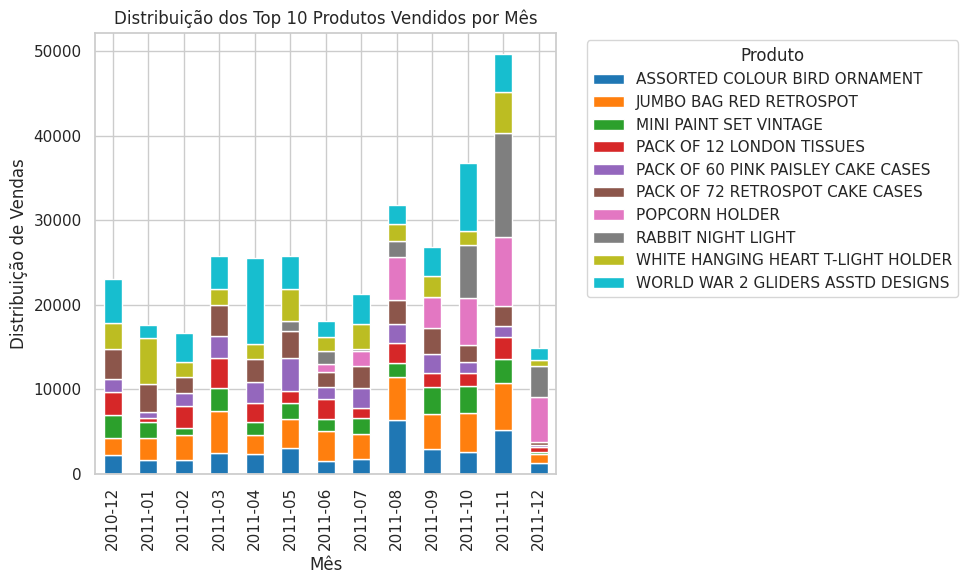

In [96]:
# Plotar o gráfico
df_mensal.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.title('Distribuição dos Top 10 Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Distribuição de Vendas')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [93]:
# Calcular as proporções mensais
df_mensal_prop = df_mensal_prop.div(df_monthly.sum(axis=1), axis=0)
df_mensal_prop

Description,ASSORTED COLOUR BIRD ORNAMENT,JUMBO BAG RED RETROSPOT,MINI PAINT SET VINTAGE,PACK OF 12 LONDON TISSUES,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES,POPCORN HOLDER,RABBIT NIGHT LIGHT,WHITE HANGING HEART T-LIGHT HOLDER,WORLD WAR 2 GLIDERS ASSTD DESIGNS
Month,,,,,,,,,,
2010-12,0.098043,0.088104,0.117182,0.115273,0.070830,0.153726,0.000000,0.000000,0.133805,0.223037
2011-01,0.096342,0.143402,0.108649,0.025353,0.041591,0.189380,0.000000,0.000000,0.310506,0.084777
2011-02,0.096859,0.177625,0.049596,0.159079,0.086748,0.114388,0.000000,0.000000,0.108884,0.206820
2011-03,0.096877,0.190999,0.106149,0.136062,0.101028,0.144287,0.000000,0.000000,0.073754,0.150844
2011-04,0.092790,0.086481,0.060658,0.086795,0.098002,0.108307,0.000000,0.000000,0.070102,0.396865
2011-05,0.117846,0.134581,0.071290,0.056030,0.153335,0.124641,0.000000,0.042556,0.148754,0.150967
2011-06,0.083743,0.194609,0.077722,0.132409,0.080594,0.098216,0.049881,0.088438,0.088328,0.106060
2011-07,0.082898,0.139591,0.086333,0.058433,0.111174,0.122324,0.081722,0.011103,0.139308,0.167114
2011-08,0.201717,0.159619,0.049800,0.075675,0.069230,0.089163,0.162889,0.057000,0.063980,0.070928


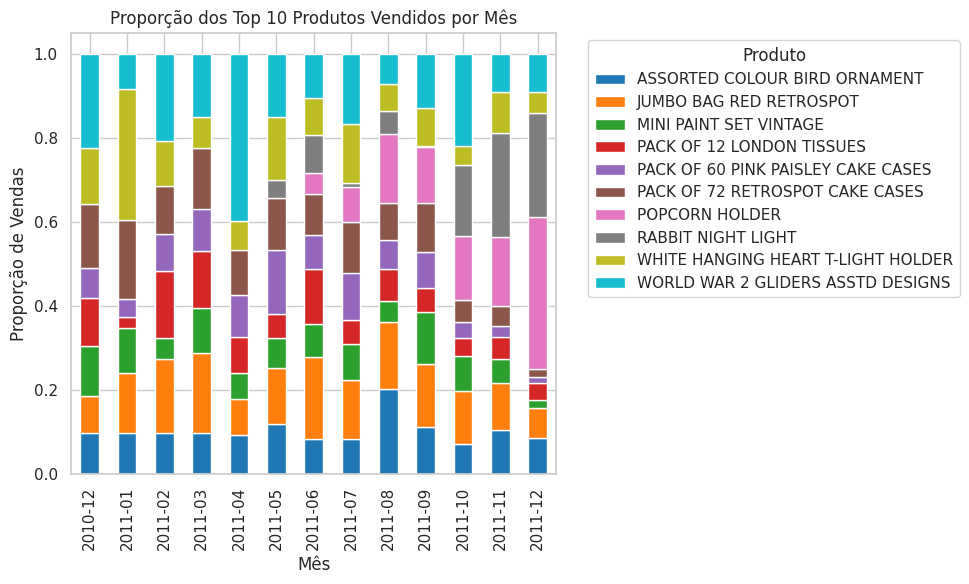

In [94]:
# Plotar o gráfico
df_mensal_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.title('Proporção dos Top 10 Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Proporção de Vendas')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###**4. Análise dos Clientes Mais Valiosos**
**Objetivo:** Identificar os clientes que mais geram receita para a empresa.

<ipython-input-15-bd3c05e5a406>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_valiosos.values, y=clientes_valiosos.index, palette='coolwarm')


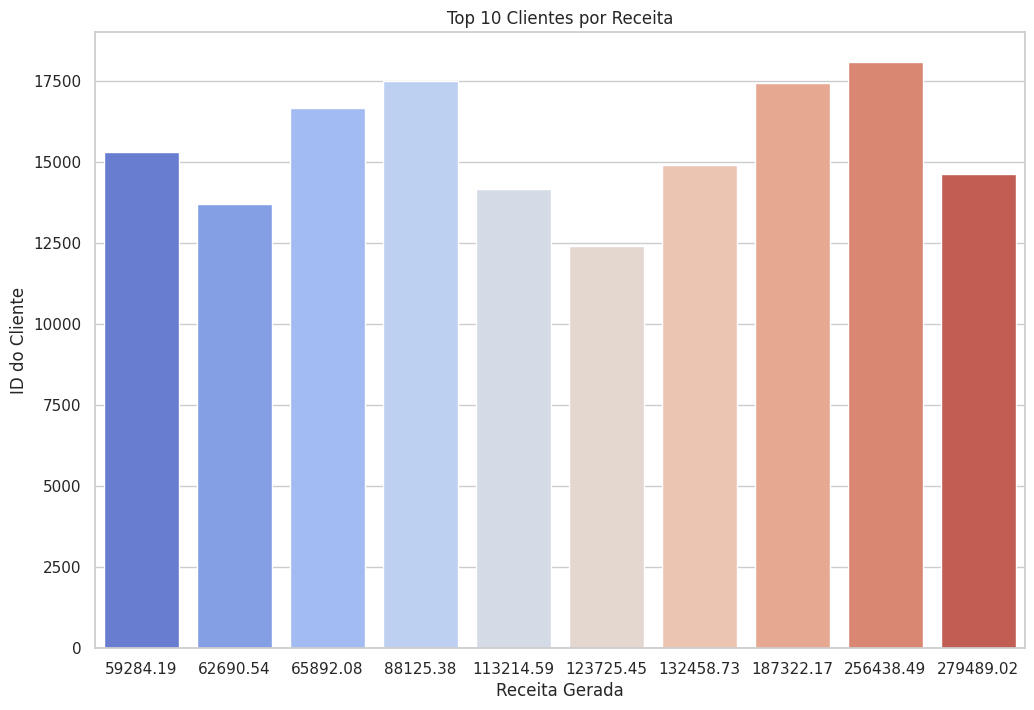

In [15]:
# Agrupar por cliente
clientes_valiosos = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Visualizar
plt.figure(figsize=(12,8))
sns.barplot(x=clientes_valiosos.values, y=clientes_valiosos.index, palette='coolwarm')
plt.title('Top 10 Clientes por Receita')
plt.xlabel('Receita Gerada')
plt.ylabel('ID do Cliente')
plt.show()


#<a name="interpretação-de-resultados"></a>6. Interpretação de Resultados
Após realizar as análises exploratórias, é crucial interpretar os resultados para transformar dados brutos em insights acionáveis.

**1. Receita por País**

**Insight:**

- **Países Líderes:** Identificamos que os principais países que contribuem para a receita são, por exemplo, Reino Unido, Alemanha e França.
- **Ação Recomendada:** Focar estratégias de marketing e personalização para esses mercados, além de considerar a expansão para mercados emergentes onde a receita ainda é baixa.


**2. Sazonalidade nas Vendas**

**Insight:**

- **Picos de Vendas:** Observamos picos de vendas durante os meses de outubro e novembro, possivelmente devido a promoções de fim de ano.
- **Ação Recomendada:** Planejar campanhas promocionais antecipadas para maximizar as vendas nesses períodos. Além disso, analisar o comportamento do consumidor para ajustar estoques de acordo.




**3. Produtos Mais Vendidos**

**Insight:**

- **Produtos Populares:** Produtos como "WORLD WAR 2 GLIDERS ASSTD DESIGNS" e "JUMBO BAG RED RETROSPOT" têm alta demanda constante.
- **Ação Recomendada:** Garantir que esses produtos estejam sempre em estoque e explorar estratégias de up-selling e cross-selling relacionados a eles.

**4. Clientes Mais Valiosos**

**Insight:**

- **Clientes VIP**: Alguns clientes representam uma parcela significativa da receita.
- **Ação Recomendada:** Implementar programas de fidelidade ou oferecer descontos exclusivos para esses clientes, incentivando a retenção e aumentando o valor do tempo de vida do cliente (CLV).

#<a name="visualizações-mais-complexas"></a>7. Visualizações Mais Complexas

###**1. Heatmap de Correlação**
**Objetivo:** Identificar correlações entre diferentes variáveis numéricas.

In [16]:
# Selecionar colunas numéricas
numericas = df.select_dtypes(include=[np.number])
numericas




,Quantity,UnitPrice,CustomerID,TotalPrice
0,6,2.55,17850.0,15.30
1,6,3.39,17850.0,20.34
2,8,2.75,17850.0,22.00
3,6,3.39,17850.0,20.34
4,6,3.39,17850.0,20.34
...,...,...,...,...
541904,12,0.85,12680.0,10.20
541905,6,2.10,12680.0,12.60
541906,4,4.15,12680.0,16.60
541907,4,4.15,12680.0,16.60


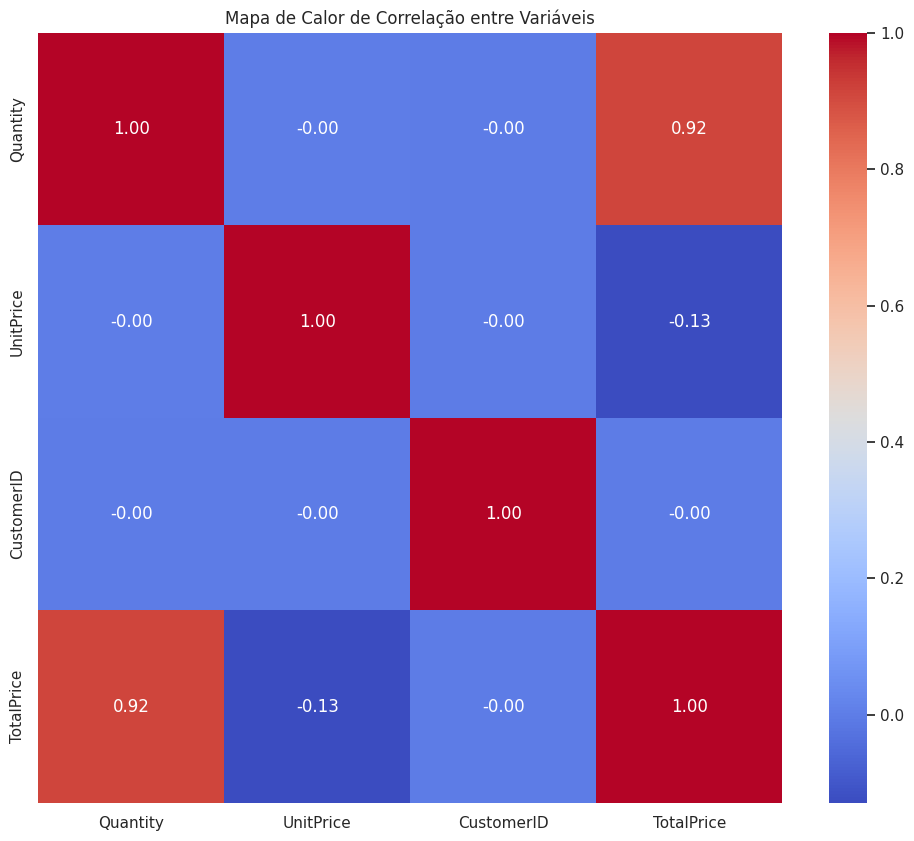

In [17]:
# Calcular a correlação
correlacao = numericas.corr()

# Plotar Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.show()

###**2. Gráfico de Dispersão com Múltiplas Variáveis**
**Objetivo:** Visualizar a relação entre duas variáveis principais, coloridas por uma terceira variável.

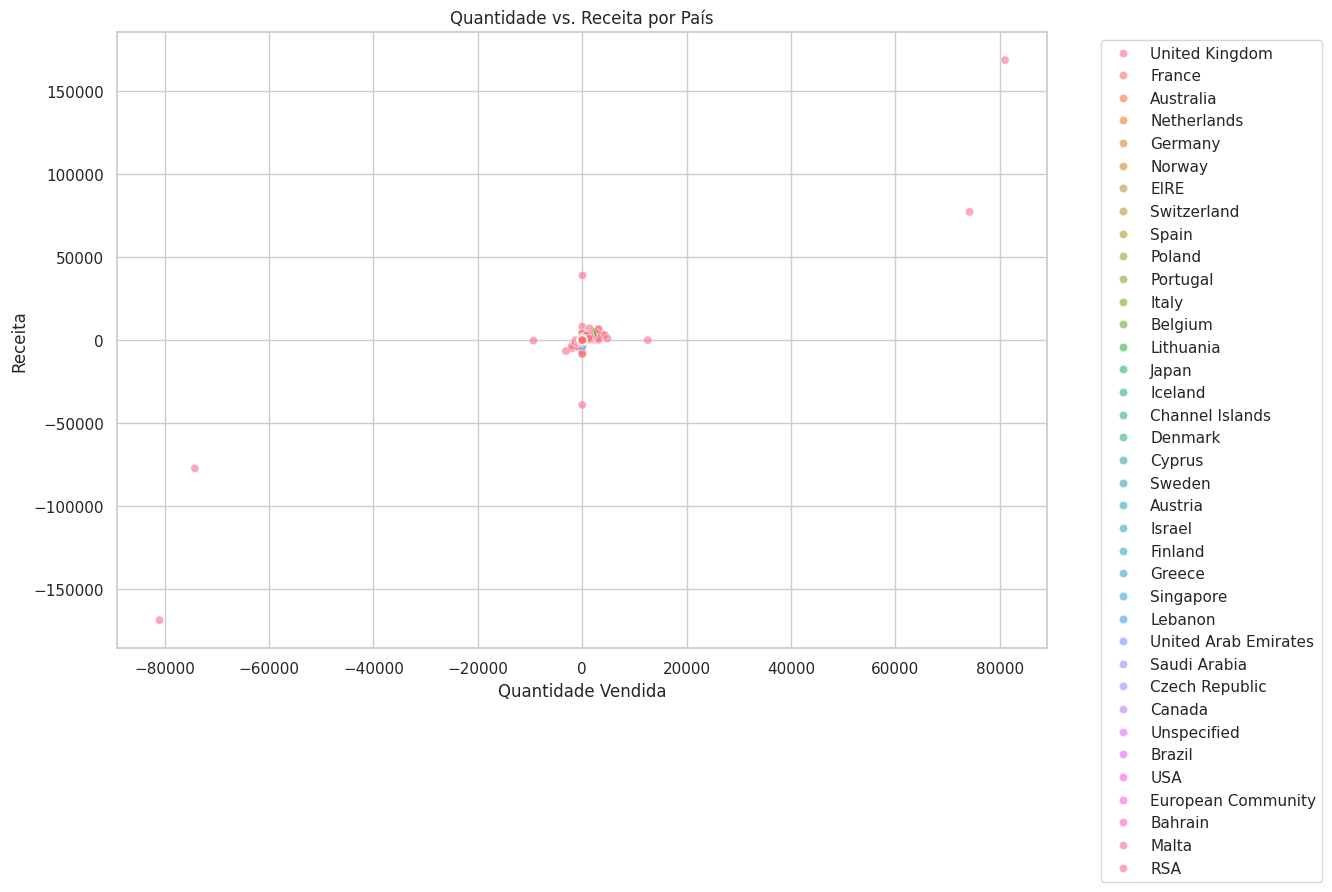

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Quantity', y='TotalPrice', hue='Country', alpha=0.6)
plt.title('Quantidade vs. Receita por País')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Receita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###**3. Visualização Interativa com Plotly**
**Objetivo:** Criar visualizações interativas que permitam explorar os dados de forma dinâmica.

In [21]:
# Exemplo: Receita por País com Plotly
fig = px.bar(vendas_por_pais.reset_index(),
             x='Country',
             y='TotalPrice',
             title='Receita por País',
             labels={'TotalPrice': 'Receita', 'Country': 'País'},
             hover_data=['TotalPrice'])

fig.update_layout(xaxis_tickangle=-45)
fig.show()


#<a name="estatísticas-e-modelagem"></a>8. Estatísticas e Modelagem

###**1. Regressão Linear para Previsão de Receita**
**Objetivo:** Prever a receita futura com base em variáveis independentes como quantidade vendida, país, etc.

RMSE: 429.63924039269585


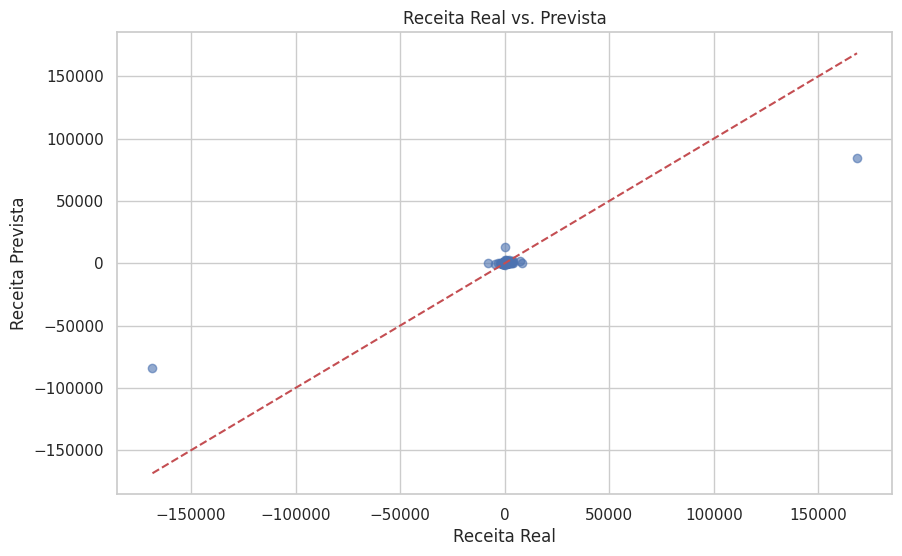

In [22]:
# Selecionar features e target
X = df[['Quantity']]  # Exemplo simplificado
y = df['TotalPrice']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Prever
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Plotar resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Receita Real')
plt.ylabel('Receita Prevista')
plt.title('Receita Real vs. Prevista')
plt.show()


###**2. Segmentação de Clientes com K-Means Clustering**
**Objetivo:** Agrupar clientes com comportamentos similares para estratégias de marketing direcionadas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

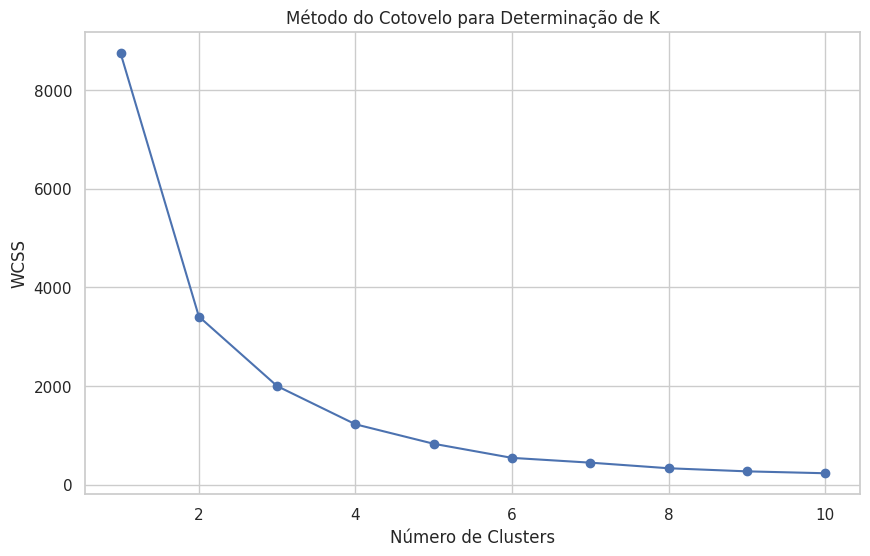

In [23]:
# Selecionar features relevantes
clientes = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes[['TotalPrice', 'Quantity']])

# Determinar o número ideal de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clientes_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Método do Cotovelo para Determinação de K')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


**Escolha de K:**

Escolha o K onde a diminuição do WCSS começa a se estabilizar. Por exemplo, K=3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



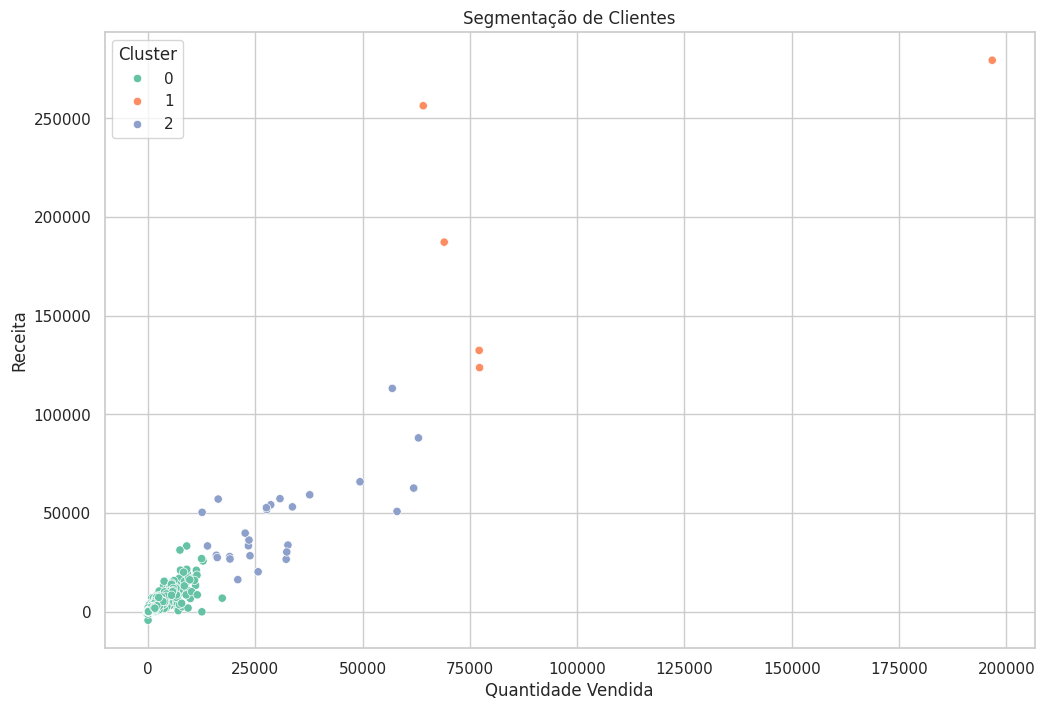

Cluster     TotalPrice                   Quantity           \
                    mean          sum          mean      sum   
0       0    1399.206529  6072556.334    825.729263  3583665   
1       1  195886.772000   979433.860  96849.400000   484247   
2       2   45427.008519  1226529.230  30553.296296   824939   

          CustomerID  
  Número de Clientes  
0               4340  
1                  5  
2                 27

In [24]:
# Aplicar K-Means com K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clientes['Cluster'] = kmeans.fit_predict(clientes_scaled)

# Visualizar os clusters
plt.figure(figsize=(12,8))
sns.scatterplot(data=clientes, x='Quantity', y='TotalPrice', hue='Cluster', palette='Set2')
plt.title('Segmentação de Clientes')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Receita')
plt.show()

# Analisar características de cada cluster
cluster_summary = clientes.groupby('Cluster').agg({
    'TotalPrice': ['mean', 'sum'],
    'Quantity': ['mean', 'sum'],
    'CustomerID': 'count'
}).rename(columns={'count': 'Número de Clientes'}).reset_index()

cluster_summary


**Interpretação:**

- **Cluster 0:** Clientes de alta receita e alta quantidade.
- **Cluster 1:** Clientes de média receita e quantidade.
- **Cluster 2:** Clientes de baixa receita e baixa quantidade.

**Ação Recomendada:** Estratégias diferenciadas para cada segmento, como programas de fidelidade para clientes de alta receita e campanhas de incentivo para clientes de baixa receita.

#<a name="conclusão"></a>9. Conclusão


**Resumo dos Principais Insights:** Ao longo deste projeto, a análise dos dados de vendas em e-commerce revelou diversos padrões importantes que podem guiar as estratégias de negócio. Identificamos os produtos mais vendidos, as sazonalidades que impactam as vendas, e os clientes que se destacam em termos de valor para a empresa. Estes insights são cruciais para otimizar as campanhas de marketing, gerenciar estoques de forma eficiente, e melhorar a experiência do cliente.

**Impacto no Negócio:** Com a aplicação dessas análises, a empresa pode esperar um aumento na retenção de clientes, uma maior previsibilidade nas vendas, e uma melhor alocação de recursos. As recomendações sugeridas devem ser implementadas para maximizar o retorno sobre o investimento e melhorar o relacionamento com os clientes.